In [ ]:
import pkg_resources

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from pytelpoint.fitting import azel_fit, best_fit_pars
from pytelpoint.visualization import plot_corner, pointing_azel_resid, pointing_histogram, pointing_residuals, pointing_sky
from pytelpoint.io import read_azel_datfile, read_raw_datfile
from pytelpoint.transform import azel_model

%load_ext autoreload
%autoreload 2

In [4]:
# this is the K&E pointing run data from august 2021

datafile = pkg_resources.resource_filename("pytelpoint", os.path.join("test_data", "k_and_e.dat"))
coo_ref, coo_meas = read_azel_datfile(datafile)
idata = azel_fit(coo_ref, coo_meas, ntune=500, nsamp=1000, cores=8) # , fit_terms=['ia', 'ie'], fixed_terms={})
#     'an': 2.47417625,
#     'aw': -10.41301937,
#     'ca': -6.96307427,
#     'npae': -2.6429775,
#     'tf': 21.43400213,
#     'tx': -2.70606889
#     }
# )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [ia, ie, an, aw, ca, npae, tf, tx, az_sigma, el_sigma]


Sampling 8 chains for 500 tune and 1_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.


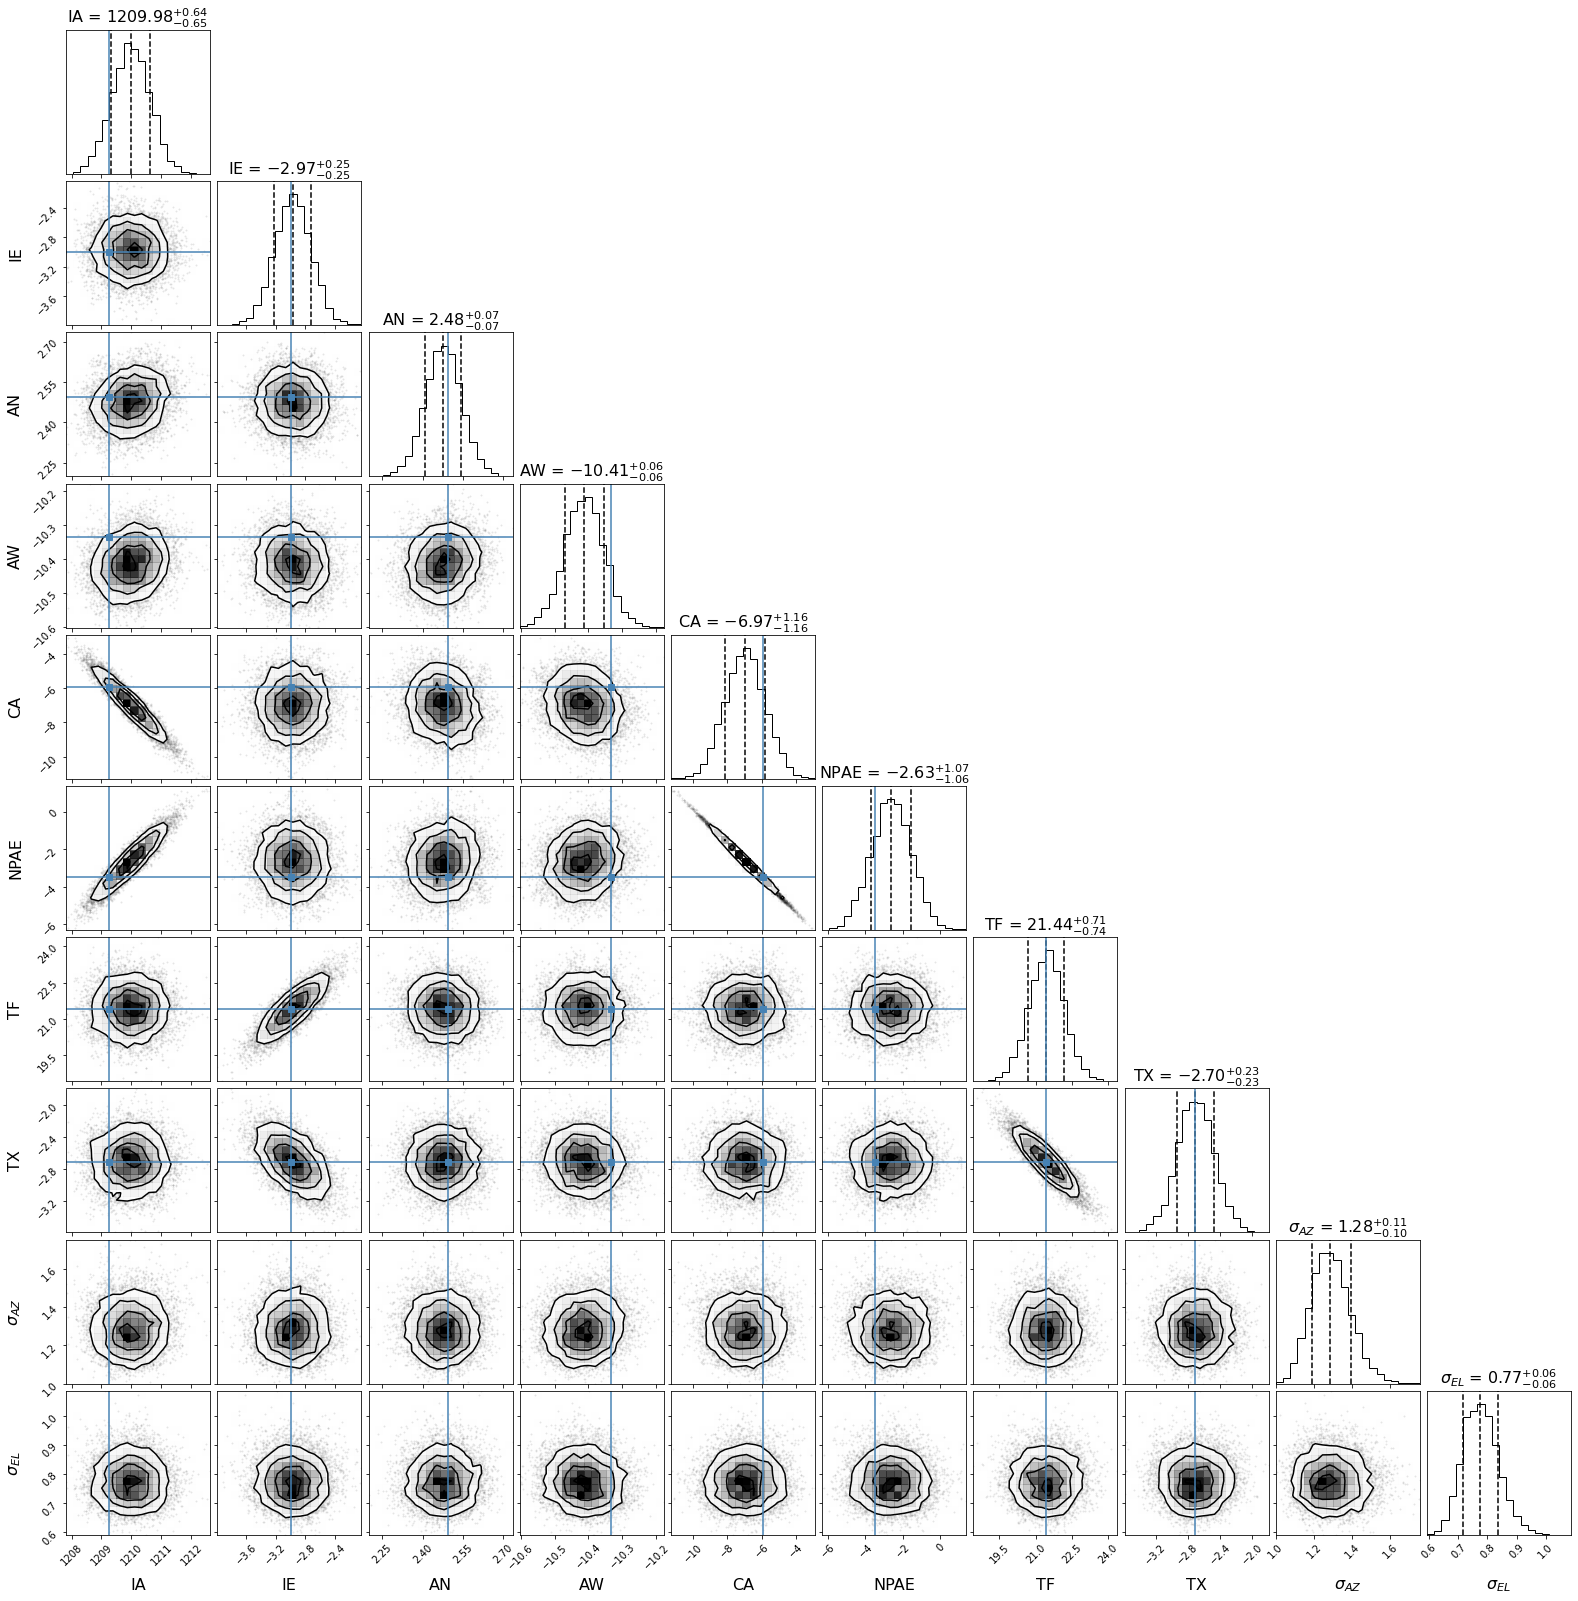

In [3]:
truths = {
    'ia': 1209.2612,
    'ie': -2.9933,
    'npae': -3.4724,
    'ca': -5.9455,
    'an': 2.4950,
    'aw': -10.3347,
    'tf': 21.4118,
    'tx': -2.7165
}
f = plot_corner(idata, truths=truths, title_kwargs={"fontsize": 16})
f.savefig("k_and_e_corner.pdf")

In [5]:
pars = best_fit_pars(idata)
pars

{'ia': 1209.96940566,
 'ie': -2.97324039,
 'an': 2.47417625,
 'aw': -10.41301937,
 'ca': -6.96307427,
 'npae': -2.6429775,
 'tf': 21.43400213,
 'tx': -2.70606889,
 'az_sigma': 1.2884008,
 'el_sigma': 0.77735836}

In [6]:
pars = best_fit_pars(idata)
pars

{'ia': 1209.96940566,
 'ie': -2.97324039,
 'an': 2.47417625,
 'aw': -10.41301937,
 'ca': -6.96307427,
 'npae': -2.6429775,
 'tf': 21.43400213,
 'tx': -2.70606889,
 'az_sigma': 1.2884008,
 'el_sigma': 0.77735836}

In [8]:
mc_coo = azel_model(coo_meas, **pars)

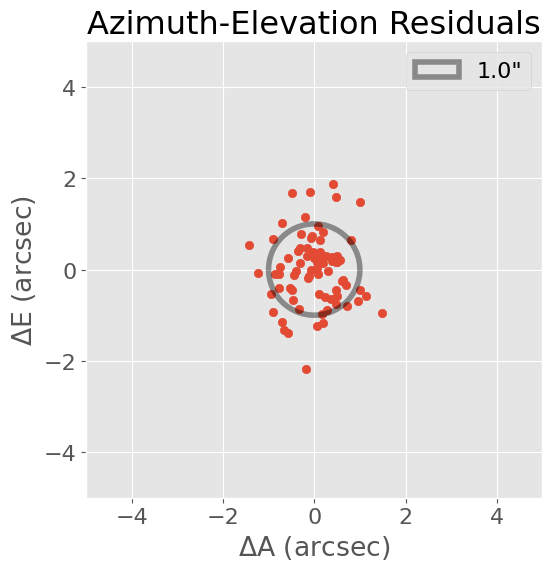

In [12]:
f = pointing_residuals(coo_ref, mc_coo, circle_size=1.0)
f.savefig("k_and_e_resid.pdf")

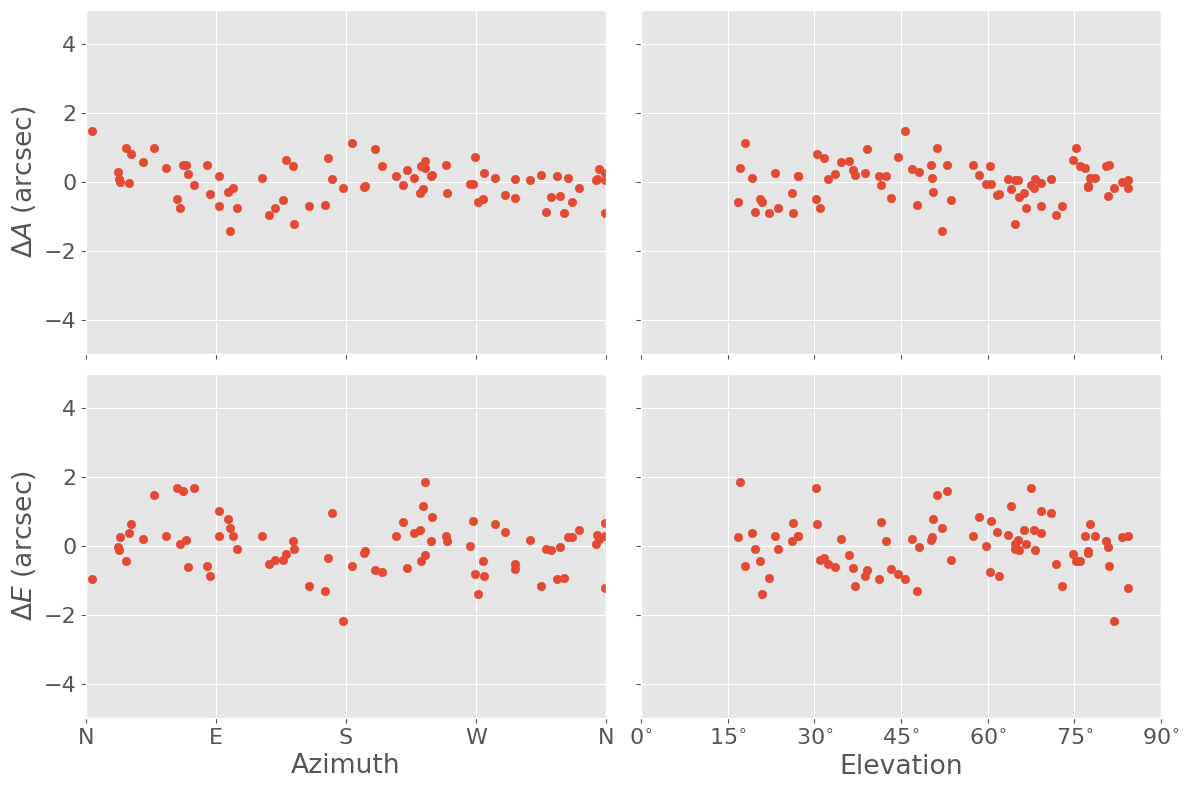

In [13]:
f = pointing_azel_resid(coo_ref, mc_coo)
f.savefig("k_and_e_azel.pdf")

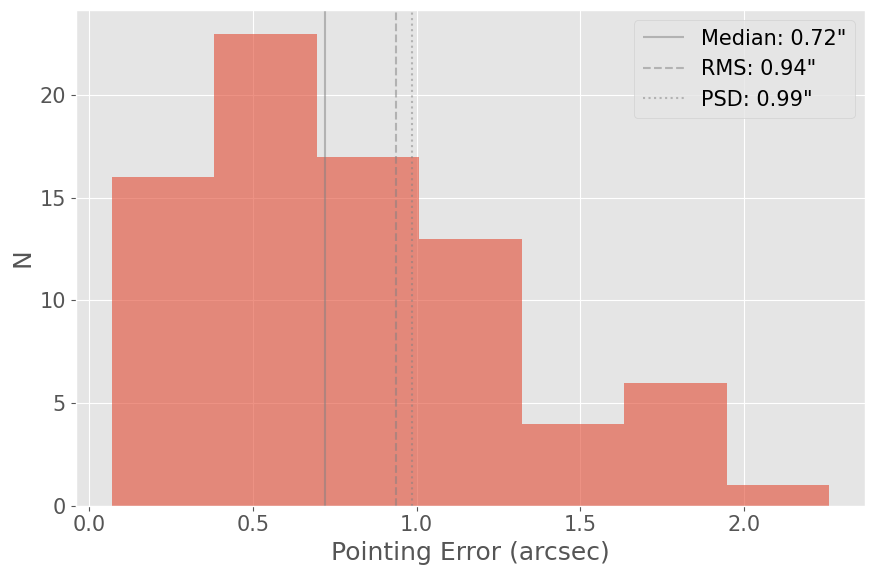

In [20]:
f = pointing_histogram(coo_ref, mc_coo, bins='freedman')
f.savefig("k_and_e_hist.pdf")

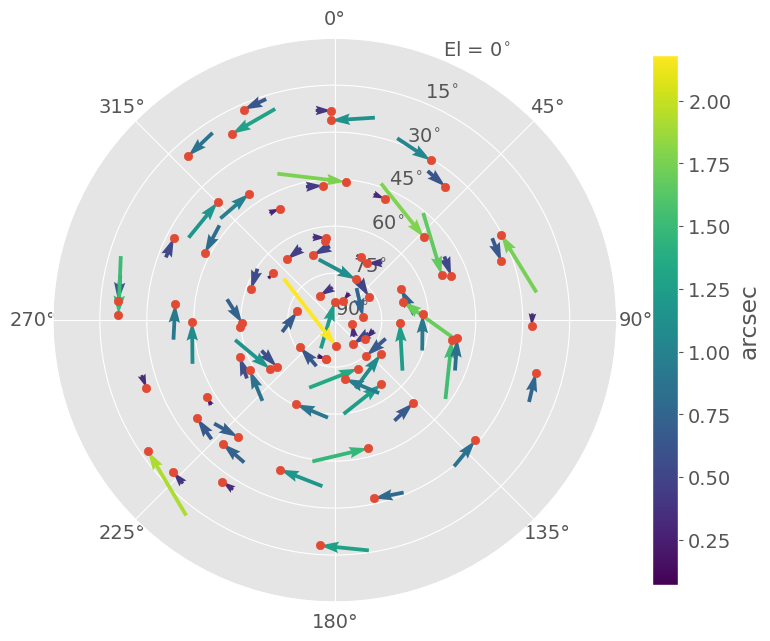

In [19]:
f = pointing_sky(coo_ref, mc_coo)
f.savefig("k_and_e_sky.pdf")

In [ ]:
# this is the f/9 pointing run from december 2020
f9_ref, f9_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20220510/point_2.dat")

In [ ]:
f9_idata = azel_fit(f9_ref, f9_meas)

In [ ]:
f9_pars = best_fit_pars(f9_idata)
f9_pars

In [ ]:
f9_pars = best_fit_pars(f9_idata)
f9_pars

In [ ]:
f9_coo = azel_model(f9_meas, **f9_pars)

In [ ]:
f = plot_corner(f9_idata)

In [ ]:
f = pointing_histogram(f9_ref, f9_coo)

In [ ]:
f = pointing_residuals(f9_ref, f9_coo)

In [ ]:
f = pointing_azel_resid(f9_ref, f9_coo)

In [ ]:
# this is the f/5 hecto pointing run done in november 2021
# f5_ref, f5_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20211129/point.dat")
f5_ref, f5_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20211212/point_20211212.dat")

In [ ]:
f5_idata = azel_fit(f5_ref, f5_meas)

In [ ]:
f5_pars = best_fit_pars(f5_idata)
f5_pars

In [ ]:
f5_coo = azel_model(f5_meas, **f5_pars)

In [ ]:
f = plot_corner(f5_idata)

In [ ]:
f = pointing_histogram(f5_ref, f5_coo)

In [ ]:
f = pointing_residuals(f5_ref, f5_coo)

In [ ]:
# this shows the need for better sampling of stars across elevation
f = pointing_azel_resid(f5_ref, f5_coo)

In [ ]:
# this is the old K&E 0th order pointing data taken back in march of 2003
oldke_ref, oldke_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20030320/pointing_3_20_2003")

In [ ]:
oldke_idata = azel_fit(oldke_ref, oldke_meas)
oldke_pars = best_fit_pars(oldke_idata)

In [ ]:
oldke_pars, pars

In [ ]:
f = plot_corner(oldke_idata)

In [ ]:
oldke_coo = azel_model(oldke_meas, **oldke_pars)

In [ ]:
# the az and el dispersions are almost twice as large here as in other pointing runs. i think the stars
# were centered by eye visually in the K&E. the camera used for the 2021 K&E run makes a significant difference.
f = pointing_residuals(oldke_ref, oldke_coo)

In [ ]:
f = pointing_histogram(oldke_ref, oldke_coo)